In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from transformers import pipeline
from PIL import Image

In [2]:
def create_shaky_image(original_image, max_shake_amount=5):
  width, height = original_image.size
  shaky_image = np.array(original_image)

  shake_x = np.random.randint(-max_shake_amount, max_shake_amount + 1, size=height)
  shake_y = np.random.randint(-max_shake_amount, max_shake_amount + 1, size=width)

  for y in range(height):
    for x in range(width):
      new_x = x + shake_x[y]
      new_y = y + shake_y[x]

      if 0 <= new_x < width and 0 <= new_y < height:
        shaky_image[y, x] = original_image.getpixel((new_x, new_y))
      else:
        shaky_image[y, x] = original_image.getpixel((x, y))

  return Image.fromarray(shaky_image.astype(np.uint8))

In [3]:
original_image = Image.open("dog.jpg")

shaky_image = create_shaky_image(original_image)

In [4]:
def wiener_filter(observed_image, noise_var):

    F_observed = np.fft.fft2(observed_image)

    PSD_observed = np.abs(F_observed) ** 2

    wiener_filter = np.conj(PSD_observed) / (PSD_observed + noise_var)

    filtered_image = np.fft.ifft2(F_observed * wiener_filter).real
    return filtered_image

In [5]:
deshake = wiener_filter(shaky_image, 10)

Text(0.5, 1.0, 'Original Image')

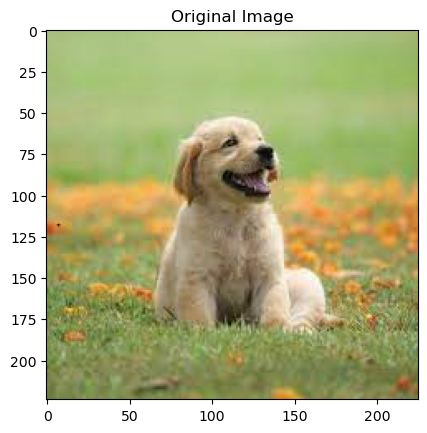

In [6]:
plt.imshow(original_image)
plt.title('Original Image')

Text(0.5, 1.0, 'Shaked image')

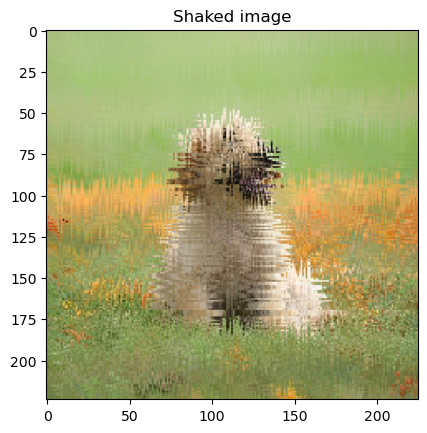

In [7]:
plt.imshow(shaky_image)
plt.title('Shaked image')

Text(0.5, 1.0, 'Deshaked image ')

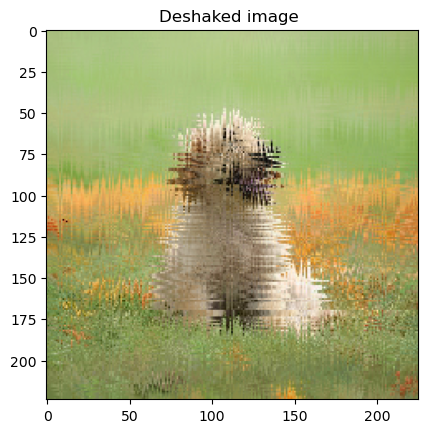

In [8]:
plt.imshow(np.clip(deshake , 0 , 255).astype(np.uint8))
plt.title('Deshaked image ')

Map Estimation

In [9]:
def map_estimation(observed_image, shaky_var, prior_var):

    map_estimate = (prior_var / (prior_var + shaky_var)) * observed_image

    return map_estimate

In [10]:
shaky_var = 50
prior_var = 45

In [11]:
deshaked = map_estimation(np.array(shaky_image), shaky_var, prior_var)

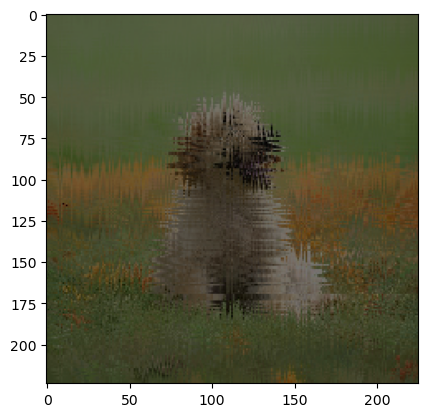

In [12]:
plt.imshow(np.clip(deshaked , 0 , 255).astype(np.uint8))

DL 

In [ ]:
#!git clone https://github.com/grishavak/LIDIA-denoiser

In [13]:
cv2.imwrite('deshaky_dogg.jpg' , np.array(shaky_image ))

True

In [ ]:
!python code/denoise_rgb.py --in_path shaky.jpg --out_path shaky2.jpg

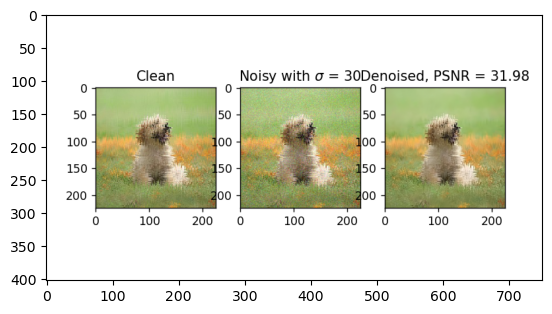

In [16]:
img__ = cv2.imread('D:\Semester_6\Image_Processing\CIA2\LIDIA-denoiser\deshaky_dogg.png')
plt.imshow( img__ )